# Contexts and their generation scenario 1

Consider the case in which there are three classes of users (C1, C2, and C3), and no information about the advertising and pricing curves is known beforehand. Consider two scenarios. 

In the first one, the structure of the contexts is known beforehand. Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves, reporting the plots with the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward. 

In the second scenario, the structure of the contexts is not known beforehand and needs to be learnt from data. 

Important remark: the learner does not know how many contexts there are, while it can only observe the features and data associated with the features. 

Apply the GP-UCB and GP-TS algorithms when using GPs to model the two advertising curves paired with a context generation algorithm, reporting the plots with the average (over a sufficiently large number of runs) value and standard deviation of the cumulative regret, cumulative reward, instantaneous regret, and instantaneous reward. 

Apply the context generation algorithms every two weeks of the simulation. 
Compare the performance of the two algorithms --- the one used in the first scenario with the one used in the second scenario. 

Furthermore, in the second scenario, run the GP-UCB and GP-TS algorithms without context generation, and therefore forcing the context to be only one for the entire time horizon, and compare their performance with the performance of the previous algorithms used for the second scenario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from utils.User_Classes import UserClass
from p4.Multi_TS_Learner import Multi_TS_Learner
from p4.Multi_UCB_Learner import Multi_UCB_Learner
from p4.class_joint_environment import Environment
import warnings

warnings.filterwarnings("ignore", message="The optimal value found*")

In [2]:
uc1 = UserClass(name = "C1")
uc2 = UserClass(name = "C2")
uc3 = UserClass(name = "C3")

user_classes = [uc1, uc2, uc3]

## Experiments

### First scenario

In [3]:
n_arms = 10
#Creating the pricing environment
prices = [50, 100, 150, 200, 250]

#Defining adv variables 
n_arms = 100
min_bid = 0.01
max_bid = 3.0
bids = np.linspace(min_bid, max_bid, n_arms)
sigma = 200

environments = [Environment(uc1), Environment(uc2), Environment(uc3)]

optimal_prices = [200, 200, 150]
sum_optimal_prices = sum(optimal_prices)
 
T = 365

n_experiments = 3

ts_rewards_per_experiment = [] #list to store the collected rewards for TS_Learner over each experiment
ucb_rewards_per_experiment = [] #list to store the collected rewards for Greedy_Learner over each experiment


In [4]:
#for each experiment, for each day, for each class
for e in range(n_experiments):
    multi_TS_learner = [Multi_TS_Learner(bids, prices), Multi_TS_Learner(bids, prices), Multi_TS_Learner(bids, prices)]
    multi_UCB_learner = [Multi_UCB_Learner(bids, prices), Multi_UCB_Learner(bids, prices), Multi_UCB_Learner(bids, prices)]


    for t in range(T):
        if t % 10 == 0:
            print(f"{t} experiments started")
        for user_class in range(len(user_classes)):
            #TS
            pulled_arms = multi_TS_learner[user_class].pull_arms()
            pulled_bids_arm = pulled_arms[0]
            pulled_prices_arm = pulled_arms[1]
            round_reward = environments[user_class].round(pulled_bids_arm, pulled_prices_arm)
            multi_TS_learner[user_class].update(pulled_bids_arm, pulled_prices_arm, *round_reward)


            # UCB
            pulled_arms = multi_UCB_learner[user_class].pull_arms()
            pulled_bids_arm = pulled_arms[0]
            pulled_prices_arm = pulled_arms[1]
            round_reward = environments[user_class].round(pulled_bids_arm, pulled_prices_arm)
            multi_UCB_learner[user_class].update(pulled_bids_arm, pulled_prices_arm, *round_reward)

    ts_rewards_per_experiment.append(sum(multi_TS_learner[x].collected_rewards for x in range(len(user_classes))))
    ucb_rewards_per_experiment.append(sum(multi_UCB_learner[x].collected_rewards for x in range(len(user_classes))))

mean_cum_reward_ts = np.mean(ts_rewards_per_experiment, axis=0)
std_cum_reward_ts = np.std(ts_rewards_per_experiment, axis=0)

mean_cum_reward_ucb = np.mean(ucb_rewards_per_experiment, axis=0)
std_cum_reward_ucb = np.std(ucb_rewards_per_experiment, axis=0)

0 experiments started
10 experiments started
20 experiments started
30 experiments started
40 experiments started
50 experiments started
60 experiments started
70 experiments started
80 experiments started
90 experiments started
100 experiments started
110 experiments started
120 experiments started
130 experiments started
140 experiments started
150 experiments started


c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


160 experiments started
170 experiments started
180 experiments started
190 experiments started
200 experiments started
210 experiments started
220 experiments started
230 experiments started
240 experiments started
250 experiments started
260 experiments started
270 experiments started
280 experiments started
290 experiments started
300 experiments started
310 experiments started
320 experiments started
330 experiments started
340 experiments started
350 experiments started
360 experiments started
0 experiments started
10 experiments started
20 experiments started
30 experiments started
40 experiments started
50 experiments started
60 experiments started
70 experiments started
80 experiments started
90 experiments started
100 experiments started
110 experiments started
120 experiments started
130 experiments started
140 experiments started
150 experiments started
160 experiments started
170 experiments started
180 experiments started
190 experiments started
200 experiments started
210

c:\Users\Andrea\miniconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:629: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


340 experiments started
350 experiments started
360 experiments started


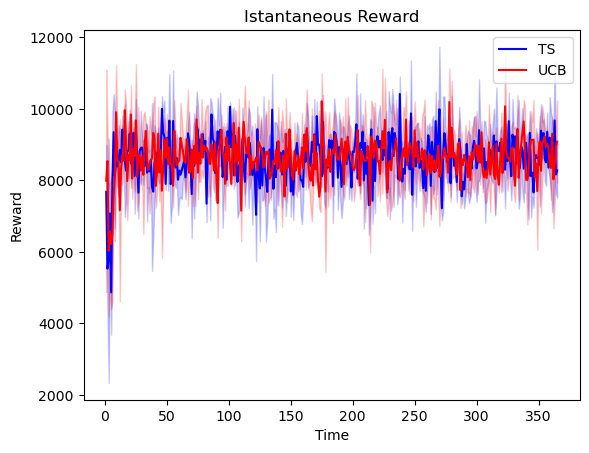

In [5]:
# Plot the results
plt.plot(range(1, T+1), mean_cum_reward_ts, 'b', label='TS')
plt.fill_between(range(1, T+1), mean_cum_reward_ts - std_cum_reward_ts, mean_cum_reward_ts + std_cum_reward_ts, alpha=0.2, color='b')

plt.plot(range(1, T+1), mean_cum_reward_ucb, 'r', label='UCB')
plt.fill_between(range(1, T+1), mean_cum_reward_ucb - std_cum_reward_ucb, mean_cum_reward_ucb + std_cum_reward_ucb, alpha=0.2, color='r')


plt.xlabel('Time')
plt.ylabel('Reward')
plt.title('Istantaneous Reward')
plt.legend()
plt.show()

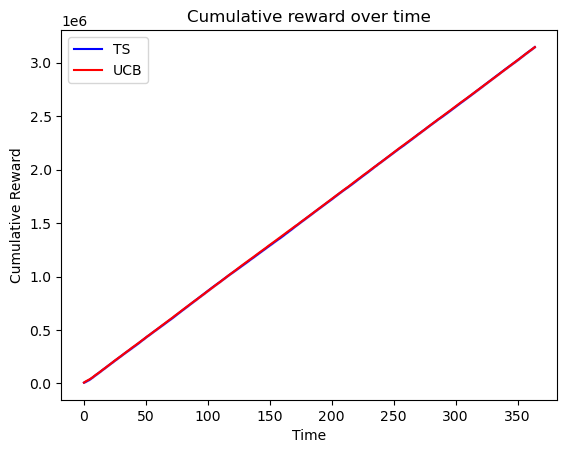

In [6]:
plt.ylabel("Cumulative Reward")
plt.xlabel("Time")
plt.title("Cumulative reward over time")

plt.plot(np.cumsum(np.mean(ts_rewards_per_experiment, axis=0)), 'b', label='TS')
plt.fill_between(range(len(mean_cum_reward_ts)), np.cumsum(mean_cum_reward_ts) - std_cum_reward_ts, np.cumsum(mean_cum_reward_ts) + std_cum_reward_ts, alpha=0.2, color='b')

plt.plot(np.cumsum(np.mean(ucb_rewards_per_experiment, axis=0)), 'r', label='UCB')
plt.fill_between(range(len(mean_cum_reward_ucb)), np.cumsum(mean_cum_reward_ucb) - std_cum_reward_ucb, np.cumsum(mean_cum_reward_ucb) + std_cum_reward_ucb, alpha=0.2, color='r')

plt.legend()
plt.show()

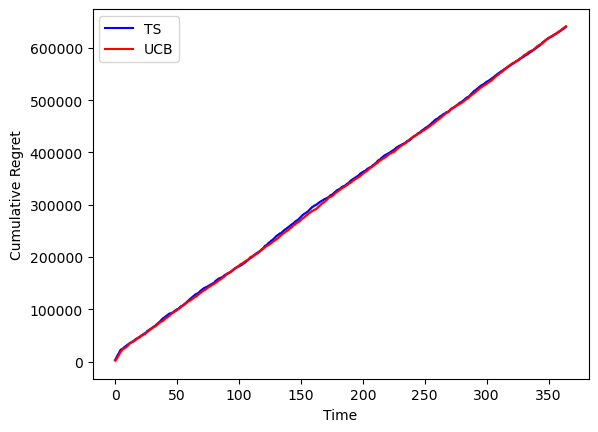

In [7]:
from utils.clairvoyant_tools import get_optimal_parameters
optimum_price1, optimum_bid1, opt1 = get_optimal_parameters(uc1.user_index)
optimum_price2, optimum_bid2, opt2 = get_optimal_parameters(uc2.user_index)
optimum_price3, optimum_bid3, opt3 = get_optimal_parameters(uc3.user_index)
opt = opt1 + opt2 + opt3

#optimum_price, optimum_bid = get_optimal_parameters(uc1.user_index)
mean_cum_regret_ts = np.mean(opt - np.array(ts_rewards_per_experiment), axis=0)
std_cum_regret_ts = np.std(opt - np.array(ts_rewards_per_experiment), axis=0)

mean_cum_regret_ucb = np.mean(opt - np.array(ucb_rewards_per_experiment), axis=0)
std_cum_regret_ucb = np.std(opt - np.array(ucb_rewards_per_experiment), axis=0)

# Plot mean and standard deviation
plt.plot(np.cumsum(mean_cum_regret_ts), 'b', label='TS')
plt.plot(np.cumsum(mean_cum_regret_ucb), 'r', label='UCB')

plt.fill_between(range(len(mean_cum_regret_ts)), np.cumsum(mean_cum_regret_ts) - std_cum_regret_ts, np.cumsum(mean_cum_regret_ts) + std_cum_regret_ts, alpha=0.2, color='b')
plt.fill_between(range(len(mean_cum_regret_ucb)), np.cumsum(mean_cum_regret_ucb) - std_cum_regret_ucb, np.cumsum(mean_cum_regret_ucb) + std_cum_regret_ucb, alpha=0.2, color='r')

plt.ylabel("Cumulative Regret")
plt.xlabel("Time")
#plt.plot(np.cumsum(opt - np.array(mean_cum_reward_ts), axis=0), 'r')
plt.legend(["TS","UCB"])
plt.show()

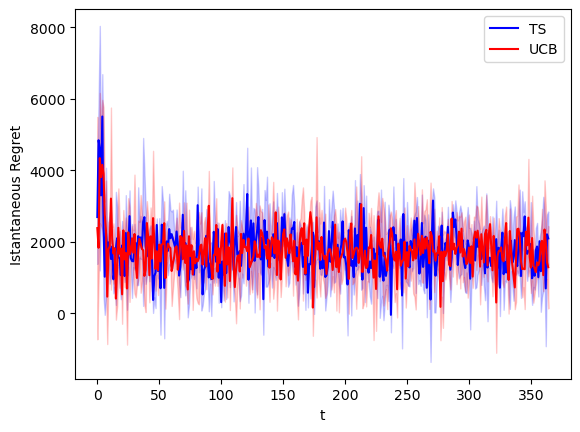

In [8]:
mean_inst_regret_ts = opt - np.mean(np.array(ts_rewards_per_experiment), axis=0)
std_inst_regret_ts = np.std(opt - np.array(ts_rewards_per_experiment), axis=0)

mean_inst_regret_ucb = opt - np.mean(np.array(ucb_rewards_per_experiment), axis=0)
std_inst_regret_ucb = np.std(opt - np.array(ucb_rewards_per_experiment), axis=0)

plt.ylabel("Istantaneous Regret")
plt.xlabel("t")
plt.plot(mean_inst_regret_ts, 'b', label='TS')
plt.plot(mean_inst_regret_ucb, 'r', label='UCB')

plt.fill_between(range(len(mean_inst_regret_ts)), mean_inst_regret_ts - std_inst_regret_ts, mean_inst_regret_ts + std_inst_regret_ts, alpha=0.2, color='b')
plt.fill_between(range(len(mean_inst_regret_ucb)), mean_inst_regret_ucb - std_inst_regret_ucb, mean_inst_regret_ucb + std_inst_regret_ucb, alpha=0.2, color='r')

#plt.plot(np.mean(opt - np.array(ts_rewards_per_experiment), axis=0), 'r', label='TS')
plt.legend(["TS","UCB"])
plt.show()